<a href="https://colab.research.google.com/github/ErnestoCash/ASAP/blob/main/Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed


Comenzando el entrenamiento
Modelo entrenado


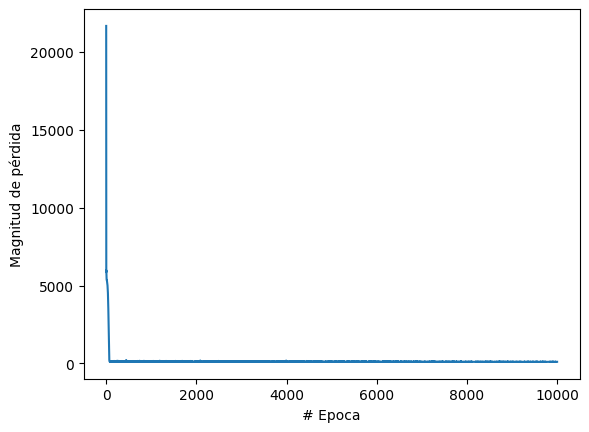

Hagamos una predicción
1/1 [==============================] - 0s 78ms/step
El resultado es 150.12585 para la acción en el paso de tiempo 11


In [ ]:
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch stock data from Yahoo Finance
stock_data = yf.download("AAPL", start="2023-01-01", end="2024-01-01")
ValorAccion = np.array(stock_data['Close'], dtype=float)
Tiempo = np.arange(1, len(ValorAccion) + 1, dtype=float)

# Define the neural network model
oculta1 = tf.keras.layers.Dense(units=5, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

# Compile the model
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='mean_squared_error'
)

# Train the model
print("Comenzando el entrenamiento")
historial = modelo.fit(Tiempo, ValorAccion, epochs=10000, verbose=False)
print("Modelo entrenado")

# Plot the training loss
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history['loss'])
plt.show()

# Make a prediction
print("Hagamos una predicción")
# Assuming you want to predict the value at time step 11
resultado = modelo.predict([11])
print("El resultado es", resultado[0][0], "para la acción en el paso de tiempo 11")
